# HOW TO PLOT A CUBE USING PYPLOT

After having achieved a Dodecahedron using a code developed by someone else, I want to test my understanding of the different functions to plot a simple shape, in this case a cube. 

First let us import all of the modules we will need:

In [2]:
import itertools as it
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

We already had a good system in the Dodecahedron code to create a cube, so I will keep using itertools to create the verices:

In [4]:
v=[p for p in it.product((-1,1),(-1,1),(-1,1))]
v=np.array(v)
print(v)

[[-1 -1 -1]
 [-1 -1  1]
 [-1  1 -1]
 [-1  1  1]
 [ 1 -1 -1]
 [ 1 -1  1]
 [ 1  1 -1]
 [ 1  1  1]]


Now that I have all 8 vertices, I need to create the faces, with each face a collection of vertices. 
I will number the vertices going from 0 to 7, following the sequence above.
This means that the cube on the "floor" will be the one with all of the z = -1, the one on the roof will be the one with all of the z = 1 and so on.

I create a legenda just to avoid making confusion:

[[-1 -1 -1]  --> 0
 [-1 -1  1]  --> 1
 [-1  1 -1]  --> 2
 [-1  1  1]  --> 3
 [ 1 -1 -1]  --> 4
 [ 1 -1  1]  --> 5
 [ 1  1 -1]  --> 6
 [ 1  1  1]] --> 7

I am not sure that the sequence should be always the same, but I reckon as long as I create a continuous path will be fine. Therefore:
FLOOR (z=-1): [0,2,6,4]
ROOF (z=1): [1,3,7,5]
FRONT (y=-1): [0,1,5,4]
BACK (y=1): [2,3,7,6]
LEFT (x=-1): [0,1,3,2]
RIGHT (x=1): [4,5,7,6]

In [6]:
g = [[0,2,6,4],[0,1,5,4],[0,1,3,2],[2,3,7,6],[4,5,7,6],[1,3,7,5]]

I have tried to put the faces so that each of them is sequentially close to the previous one, although I do not think this is going to matter in the end. We can test this later. 

In terms of colours I think we can use the same colour for top and bottom and then 4 different colours on the sides. 
We could of course use just 2 for the four sides, with a total of 3, but I don't mind making it a bit more colourful. 

In [10]:
a = [0,1,2,3,4,0]

I will try first to plot the cube without colours, as I am not totally sure how to use the colour function. 

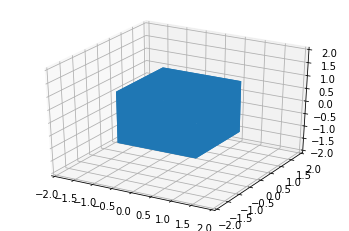

In [7]:
fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(-2, 2)
for f in range(6):
    c=Poly3DCollection([[tuple(y) for y in v[g[f],:]]], linewidths=1, alpha=1)
    ax.add_collection3d(c)

plt.show()

It seems like this is working fine. Probably I want to reduce the axes limits a bit to zoom in closer to the shape. 
Let us try that: 

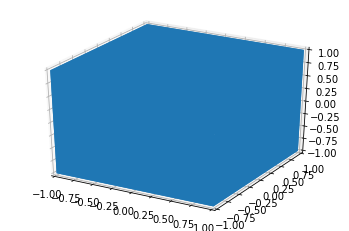

In [8]:
fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
for f in range(6):
    c=Poly3DCollection([[tuple(y) for y in v[g[f],:]]], linewidths=1, alpha=1)
    ax.add_collection3d(c)

plt.show()

Let us try to add the colours now. The function according to the documentation takes two arguments "Self" and "Colours". Self is not quite clear in this case. Is this the vertices? Let us try that:

TypeError: set_facecolor() takes 2 positional arguments but 3 were given

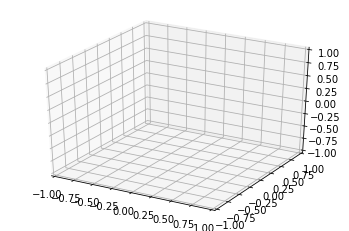

In [11]:
fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
for f in range(6):
    c=Poly3DCollection([[tuple(y) for y in v[g[f],:]]], linewidths=1, alpha=1)
    c.set_facecolor(v,[a[f]])
    ax.add_collection3d(c)

plt.show()

This is weird! Maybe I should try by giving just the colours? 

ValueError: Invalid RGBA argument: 0

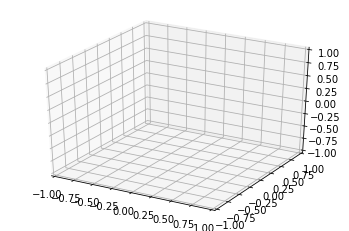

In [12]:
fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
for f in range(6):
    c=Poly3DCollection([[tuple(y) for y in v[g[f],:]]], linewidths=1, alpha=1)
    c.set_facecolor([a[f]])
    ax.add_collection3d(c)

plt.show()

Obviously that is even worse. I am not sure why for the dodecahedron we have passed as "Self" the vertices of a cube.... maybe this would work in this case too? 

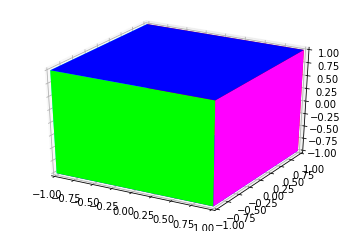

In [15]:
fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
for f in range(6):
    c=Poly3DCollection([[tuple(y) for y in v[g[f],:]]], linewidths=1, alpha=1)
    c.set_facecolor([(0,0,1),(0,1,0),(0,1,1),(1,0,0),(1,0,1),(1,1,0)][a[f]])
    ax.add_collection3d(c)
plt.show()

Bingo! I reckon we can always pass the three dimensional cube to represent the space where the figure is inscribed (or roughly where it is centered). It's not very clear how the numbers correspond to colours. I can give it a try by changing numbers to colours and see what happens:

TypeError: list indices must be integers or slices, not str

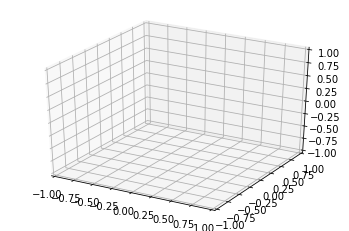

In [16]:
a = ["red","yellow","blue","yellow","blue","red"]
fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
for f in range(6):
    c=Poly3DCollection([[tuple(y) for y in v[g[f],:]]], linewidths=1, alpha=1)
    c.set_facecolor([(0,0,1),(0,1,0),(0,1,1),(1,0,0),(1,0,1),(1,1,0)][a[f]])
    ax.add_collection3d(c)
plt.show()

This confirms that I need to use numbers instead of colours. It seems like the number are indexes to refer to a color palette, but I am not sure how that works. Let us try to tinker with a. 

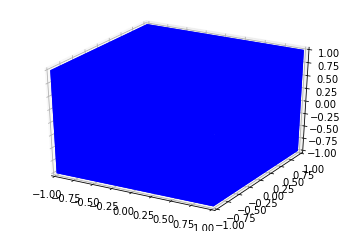

In [17]:
a = [0,0,0,0,0,0]
fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
for f in range(6):
    c=Poly3DCollection([[tuple(y) for y in v[g[f],:]]], linewidths=1, alpha=1)
    c.set_facecolor([(0,0,1),(0,1,0),(0,1,1),(1,0,0),(1,0,1),(1,1,0)][a[f]])
    ax.add_collection3d(c)
plt.show()

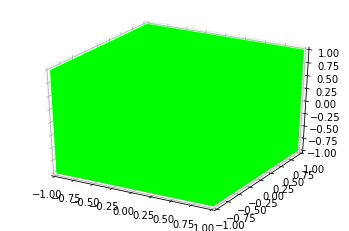

In [18]:
a = [1,1,1,1,1,1]
fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
for f in range(6):
    c=Poly3DCollection([[tuple(y) for y in v[g[f],:]]], linewidths=1, alpha=1)
    c.set_facecolor([(0,0,1),(0,1,0),(0,1,1),(1,0,0),(1,0,1),(1,1,0)][a[f]])
    ax.add_collection3d(c)
plt.show()

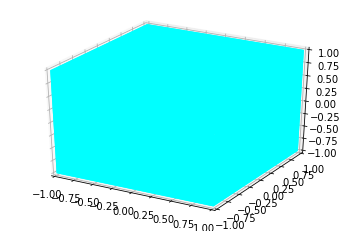

In [19]:
a = [2,2,2,2,2,2]
fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
for f in range(6):
    c=Poly3DCollection([[tuple(y) for y in v[g[f],:]]], linewidths=1, alpha=1)
    c.set_facecolor([(0,0,1),(0,1,0),(0,1,1),(1,0,0),(1,0,1),(1,1,0)][a[f]])
    ax.add_collection3d(c)
plt.show()

It is clear that each number has a univocal correspondence to a colour but it is not clear how the colours map. 
In any case I think the experiment works out and we could maybe pass to more complicated shapes. 